In [59]:
!pip install yfinance
!pip install matplotlib
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [4]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import requests
from bs4 import BeautifulSoup

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Question 1 - Extracting Tesla Stock Data Using yfinance**

In [11]:
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period = "max")

In [63]:
dates=[]
revenues=[]
tesla_stock.reset_index(inplace = True)
tesla_stock.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Question 2: Use Webscraping to Extract Tesla Revenue Data**

In [66]:
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_data_scrap = requests.get(tesla_url).text

In [67]:
dates = []
revenues = []
tesla_dataframe=pd.read_html(tesla_data_scrap)
tesla_revenue=tesla_dataframe[1]

soup1 = BeautifulSoup(tesla_data_scrap, 'html.parser')

soup1.find("tbody").find_all("tr")

tesla_revenue.columns=["Date","Revenue"]
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''},regex=True)
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

<>:11: SyntaxWarning:

invalid escape sequence '\$'

<>:11: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\paulg_pxqximm\AppData\Local\Temp\ipykernel_24636\3403115204.py:11: SyntaxWarning:

invalid escape sequence '\$'



,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


**Question 3: Use yfinance to Extract Stock Data**

In [71]:
gamestop = yf.Ticker("GME")
gme_stock = gamestop.history(period="max")

In [72]:
dates=[]
revenues=[]
gme_stock.reset_index(inplace = True)
gme_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Question 4: Use Webscraping to Extract GME Revenue Data**

In [76]:
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_data_scrap = requests.get(gme_url).text

In [78]:
dates=[]
revenues=[]
gme_dataframe=pd.read_html(gme_data_scrap)
gme_revenue=gme_dataframe[1]

soup2 = BeautifulSoup(gme_data_scrap, 'html.parser')

soup2.find("tbody").find_all("tr")

gme_revenue.columns=["Date","Revenue"]

gme_revenue['Revenue']=gme_revenue['Revenue'].replace({',|\$':'',',':''},regex=True)

gme_revenue.dropna(inplace=True)

gme_revenue=gme_revenue[gme_revenue['Revenue']!=""]
gme_revenue.tail()

<>:12: SyntaxWarning:

invalid escape sequence '\$'

<>:12: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\paulg_pxqximm\AppData\Local\Temp\ipykernel_24636\2749019635.py:12: SyntaxWarning:

invalid escape sequence '\$'



,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [80]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

**Question 5: Plot Tesla Stock Graph**

C:\Users\paulg_pxqximm\AppData\Local\Temp\ipykernel_24636\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\paulg_pxqximm\AppData\Local\Temp\ipykernel_24636\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



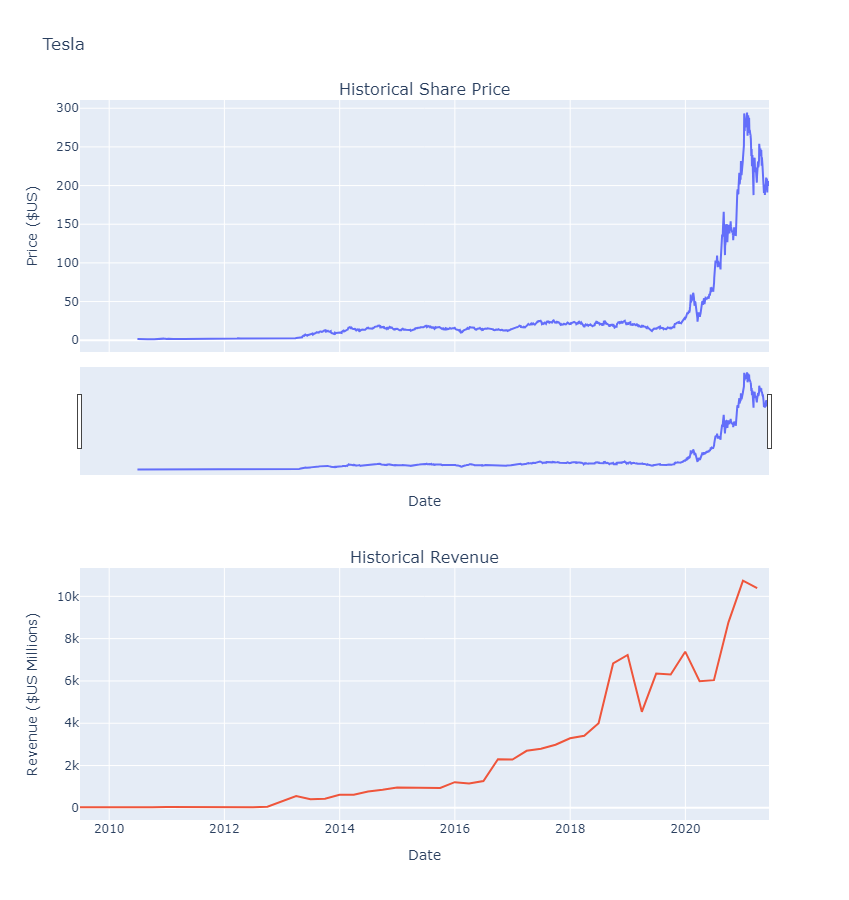

In [83]:
make_graph(tesla_stock, tesla_revenue, 'Tesla')

**Question 6: Plot GameStop Stock Graph**

C:\Users\paulg_pxqximm\AppData\Local\Temp\ipykernel_24636\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\paulg_pxqximm\AppData\Local\Temp\ipykernel_24636\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



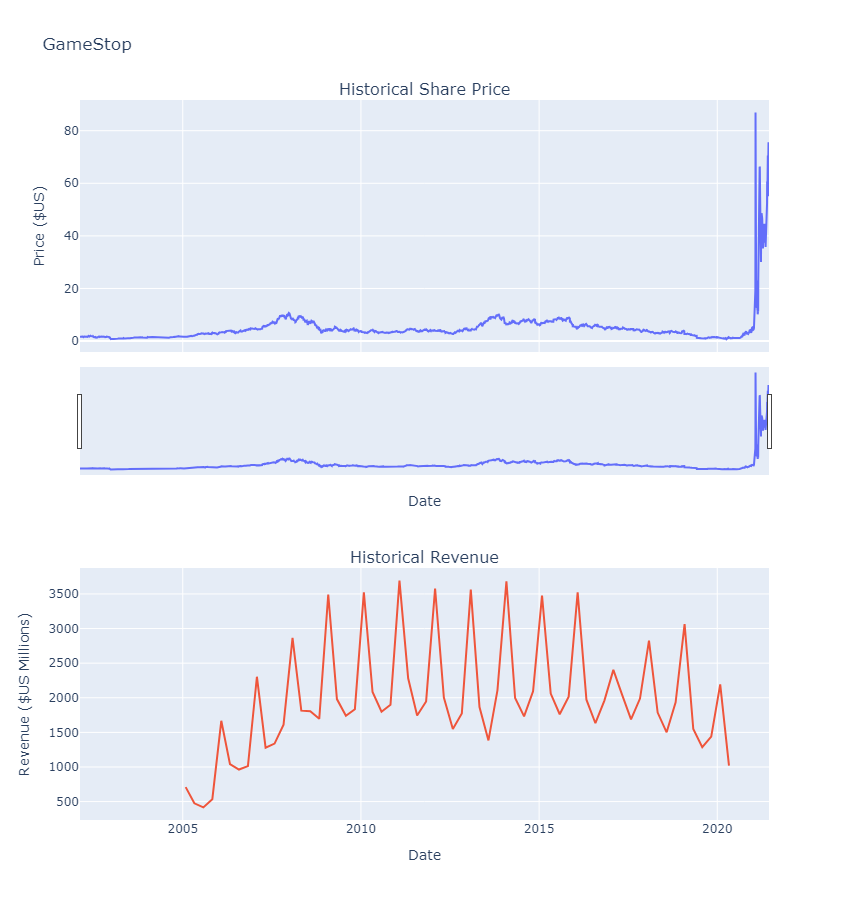

In [57]:
make_graph(gme_stock, gme_revenue, 'GameStop')